# Import packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import glob
import os
from langdetect import detect
from pandasql import sqldf

# EDA

## Nasdaq Composite

In [2]:
nasdaq_df = pd.read_csv('NASDAQ.csv')

In [3]:
nasdaq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,12958.519531,12958.719727,12543.240234,12698.450195,12698.450195,6546740000
1,2021-01-05,12665.650391,12828.269531,12665.650391,12818.959961,12818.959961,6904420000
2,2021-01-06,12666.150391,12909.629883,12649.990234,12740.790039,12740.790039,7648340000
3,2021-01-07,12867.339844,13090.910156,12867.339844,13067.480469,13067.480469,6777010000
4,2021-01-08,13160.219727,13208.089844,13036.549805,13201.980469,13201.980469,7223660000


In [4]:
print(nasdaq_df.info())
print(nasdaq_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None
               Open          High           Low         Close     Adj Close  \
count    251.000000    251.000000    251.000000    251.000000    251.000000   
mean   14365.893068  14449.994343  14265.493973  14366.589466  14366.589466   
std      877.415640    870.231766    885.708538    878.791311    878.791311   
min    12665.650391  12828.269531  12397.049805  12609.160156  12609.160156   
25%    13681.439942  13726.405274  13552.469727  13633.169922  13633.1699

In [5]:
#converting to datetime format
nasdaq_df['Date'] = nasdaq_df.apply(lambda row : datetime.strptime(row['Date'],"%Y-%m-%d"), axis = 1)

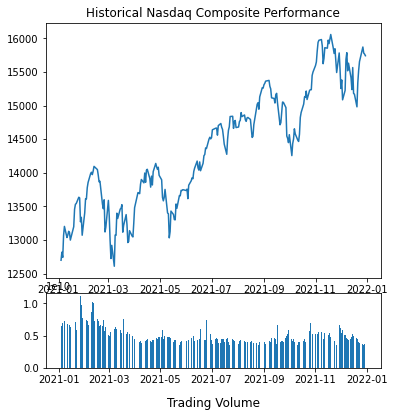

In [6]:
#Visualise Nasdaq past year performance with volume
nasdaq_data = nasdaq_df.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(nasdaq_data.index, nasdaq_data["Close"])
plt.title('Historical Nasdaq Composite Performance')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(nasdaq_data.index, nasdaq_data['Volume'])
plt.title('Trading Volume', y=-0.60)
plt.gcf().set_size_inches(6,8)

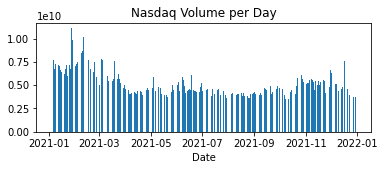

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(6,2))
plt.bar(nasdaq_data.index, nasdaq_data['Volume'])
plt.title('Nasdaq Volume per Day')
plt.xlabel('Date')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('nasdaq.png', dpi=100)

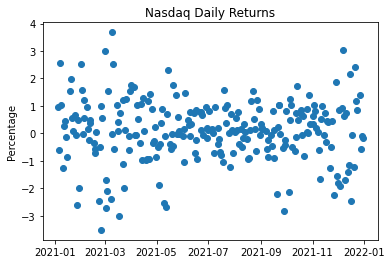

<Figure size 432x288 with 0 Axes>

In [8]:
#add new column for change in daily price
nasdaq_data['%change'] = nasdaq_data['Close'].pct_change()*100

#visualise how daily fluctuations change throughout the year
plt.figure(figsize=(6,4))
plt.scatter(nasdaq_data.index,nasdaq_data['%change'])
plt.ylabel('Percentage')
plt.title('Nasdaq Daily Returns')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('return1.png', dpi=100)

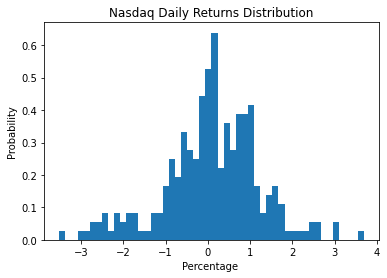

<Figure size 432x288 with 0 Axes>

In [9]:
#visualise the probability distribution of nasdaq daily fluctuations
plt.figure(figsize=(6,4))
plt.hist(nasdaq_data['%change'], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Percentage ')
plt.title('Nasdaq Daily Returns Distribution')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('return2.png', dpi=100)

## Twitter data 

In [10]:
twitter_df = pd.read_csv('scraped-tweets-v1.csv')
twitter_df.head()

,Datetime,Tweet Id,Text,Likes,Retweets,Username
0,2021-12-31 23:53:38+00:00,1477065441117827072,“cinnamon apple sauce is our special today and...,1,0,alxxxis_
1,2021-12-31 23:46:57+00:00,1477063759172669444,Hey @Apple Portrait mode does not work well fo...,1,0,apaulbrown
2,2021-12-31 23:45:19+00:00,1477063349330452484,$AAPL was the 11th most mentioned on wallstree...,0,1,topstonks
3,2021-12-31 23:26:26+00:00,1477058597381185537,@MoonMark_ So if I buy 1 share of Apple stock ...,24,0,LegionGlowV2
4,2021-12-31 23:09:44+00:00,1477054394319335424,"ARGH! We are not a whiskey household, so it's ...",10,0,IsSasquatch


In [11]:
print(twitter_df.info())
print(twitter_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88192 entries, 0 to 88191
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  88192 non-null  object
 1   Tweet Id  88192 non-null  int64 
 2   Text      88192 non-null  object
 3   Likes     88192 non-null  int64 
 4   Retweets  88192 non-null  int64 
 5   Username  88192 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.0+ MB
None
           Tweet Id         Likes      Retweets
count  8.819200e+04  88192.000000  88192.000000
mean   1.408629e+18     15.063985      2.425084
std    3.989003e+16    248.922897     55.363111
min    1.344795e+18      0.000000      0.000000
25%    1.372190e+18      1.000000      0.000000
50%    1.407396e+18      2.000000      0.000000
75%    1.445480e+18      5.000000      1.000000
max    1.477065e+18  56646.000000  14517.000000


In [12]:
#converting to datetime format and retain only day information
twitter_df['Datetime'] = twitter_df.apply(lambda row : datetime.fromisoformat(row['Datetime']), axis = 1)
twitter_df['Datetime'] = twitter_df.apply(lambda row : row['Datetime'].strftime('%Y-%m-%d'), axis = 1)
twitter_df['Datetime'] = twitter_df.apply(lambda row : datetime.strptime(row['Datetime'],"%Y-%m-%d"), axis = 1)

#check if any duplicates
twitter_df['Tweet Id'].nunique()

#drop tweets that have duplicate entry
twitter_df = twitter_df.drop_duplicates(subset=['Tweet Id'])

In [13]:
#number of unique tweet
len(twitter_df)

78773

In [14]:
#number of unique user
twitter_df['Username'].nunique()

45408

In [15]:
#look at top 10 users in terms of number of tweet
top_tweet_users = pd.DataFrame(twitter_df['Username'].value_counts())
top_tweet_users = top_tweet_users.rename(columns = {"Username": "count"})
top_tweet_users['% of total tweets'] = top_tweet_users['count']/len(twitter_df)*100
top_tweet_users.head(10)

,count,% of total tweets
DataLoverDrops,673,0.854354
StockWatcherUK,479,0.608076
UPBOptionMil,472,0.599190
davidmoadel,472,0.599190
stockmentionbot,366,0.464626
SnailMonitor,361,0.458279
TheDataPros,325,0.412578
TrendSpider,303,0.384650
CustomPC_UK,287,0.364338
SmartOptionsAi,283,0.359260


In [16]:
#look at top 10 tweets in terms of number of likes
twitter_df.sort_values(by = 'Likes',ascending = False).head(10)

,Datetime,Tweet Id,Text,Likes,Retweets,Username
63940,2021-01-27,1354557666488586242,"Wall Street: ""We want a free market"" The Inter...",56646,14517,JonathanYMusic
19313,2021-06-06,1401645147557974017,One thing I’ve always admired about Steve Jobs...,21824,3100,nayibbukele
19690,2021-06-01,1399834491468800004,I believe Binance coin $BNB will be bigger tha...,17438,1806,Davincij15
53631,2021-10-08,1446551635212242944,There’s smartphone leaks… and then there’s Goo...,13714,659,MKBHD
19840,2021-05-30,1399137990094381056,buy. apple. stock. https://t.co/yQs8TSZHOu,9632,237,goldengateblond
12359,2021-09-02,1433495485227089921,"If you had invested $1,000 in $AAPL stock in 1...",7886,681,BusinessFamous
50926,2021-12-09,1468911413682921475,This is the most astonishing thing. I never wo...,7566,1590,CEOAdam
58112,2021-06-08,1402377245713485824,I just pulled a random stock image from google...,7522,396,CountDankulaTV
63617,2021-01-29,1355020057060012036,me investing into the stock market today after...,7119,1175,drea_dlc
83617,2021-11-28,1464752866225176577,the Xbox Series S outsold the PS5 and Xbox Ser...,6488,524,tomwarren


In [17]:
#look at top 10 tweets in terms of number of retweet
twitter_df.sort_values(by = 'Retweets',ascending = False).head(10)

,Datetime,Tweet Id,Text,Likes,Retweets,Username
63940,2021-01-27,1354557666488586242,"Wall Street: ""We want a free market"" The Inter...",56646,14517,JonathanYMusic
19313,2021-06-06,1401645147557974017,One thing I’ve always admired about Steve Jobs...,21824,3100,nayibbukele
46241,2021-04-12,1381701380877004801,ICYMI: Recent financial disclosures show Speak...,5730,3022,RobletoFire
19690,2021-06-01,1399834491468800004,I believe Binance coin $BNB will be bigger tha...,17438,1806,Davincij15
64610,2021-01-14,1349788411926777856,"Jesus Christ, there’s so much fraud on Spotify...",4278,1676,SociableBarely
50926,2021-12-09,1468911413682921475,This is the most astonishing thing. I never wo...,7566,1590,CEOAdam
7553,2021-10-21,1451217723078455306,"💚 ""𝗟𝗜𝗞𝗘 + 𝗥𝗧"" to win a #GFUEL Mobile App-EXCLU...",1969,1456,GFuelEnergy
58508,2021-05-27,1397999596589158400,My vision for the Top 10: $ETH Internet of Blo...,5708,1363,nosleepjon
15313,2021-07-27,1420141872039743488,"Apple today: ""In 3 months, we spent $10 billio...",4788,1321,Snowden
28429,2021-03-02,1366557732501880833,"NEW: Majorie Taylor Greene, who screams about ...",2382,1177,NoahShachtman


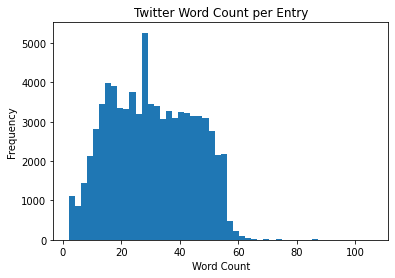

Max word count: 106
Avg word count: 30
Min word count: 2


<Figure size 432x288 with 0 Axes>

In [18]:
#add a column to include number of words for each tweet
twitter_df['word count'] = twitter_df['Text'].str.split().apply(len)

#visualise the frequency distribution of word count
plt.hist(twitter_df['word count'], density=False, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Word Count')
plt.title('Twitter Word Count per Entry')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('twitter2.png', dpi=100)

print("Max word count: " + str(max(twitter_df['word count'])))
print("Avg word count: " + str(round(sum(twitter_df['word count'])/len(twitter_df['word count']))))
print("Min word count: " + str(min(twitter_df['word count'])))

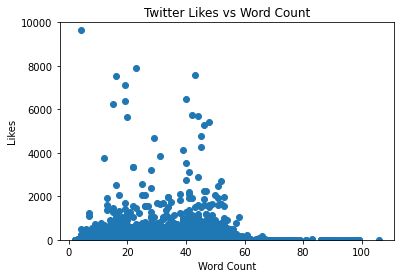

<Figure size 432x288 with 0 Axes>

In [19]:
#likes vs word count
plt.figure(figsize=(6,4))
plt.scatter(twitter_df['word count'],twitter_df['Likes'])
plt.title('Twitter Likes vs Word Count')
plt.xlabel('Word Count')
plt.ylabel('Likes')
plt.ylim(0,10000)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('twitter3.png', dpi=100)

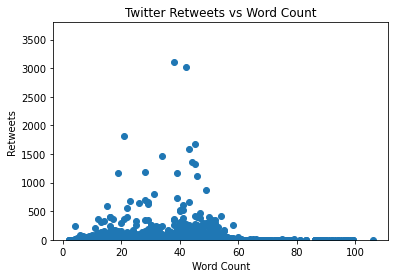

<Figure size 432x288 with 0 Axes>

In [20]:
#retweet vs word count
plt.figure(figsize=(6,4))
plt.scatter(twitter_df['word count'],twitter_df['Retweets'])
plt.title('Twitter Retweets vs Word Count')
plt.xlabel('Word Count')
plt.ylabel('Retweets')
plt.ylim(0,3800)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('twitter4.png', dpi=100)

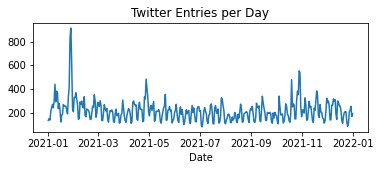

Max tweet count: 915 on 2021-01-28 00:00:00
Avg tweet count: 216
Min tweet count: 80 on 2021-07-04 00:00:00


<Figure size 432x288 with 0 Axes>

In [21]:
#visualise how many tweets sent every day
plt.figure(figsize=(6,2))
plt.plot(twitter_df.groupby('Datetime')['Tweet Id'].count())
plt.title('Twitter Entries per Day')
plt.xlabel('Date')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('twitter.png', dpi=100)

print("Max tweet count: " + str(max(twitter_df.groupby('Datetime')['Tweet Id'].count())) \
      + " on " + str(twitter_df.groupby('Datetime')['Tweet Id'].count().index[ \
      np.argmax(twitter_df.groupby('Datetime')['Tweet Id'].count())]))

print("Avg tweet count: " + str(round(sum(twitter_df.groupby('Datetime')['Tweet Id'].count())/ \
                                      len(twitter_df.groupby('Datetime')['Tweet Id'].count()))))

print("Min tweet count: " + str(min(twitter_df.groupby('Datetime')['Tweet Id'].count())) \
      + " on " + str(twitter_df.groupby('Datetime')['Tweet Id'].count().index[ \
      np.argmin(twitter_df.groupby('Datetime')['Tweet Id'].count())]))

## Reddit Data

In [22]:
#read all stocks submissions as one dataset
redtitle_df = pd.read_csv("redtitle_df.csv")

#read all submissions comments as one dataset
redcomms_df = pd.read_csv("redcomms_df.csv")

#combine all submissions and comments into one dataset
redtitle_df = redtitle_df.iloc[:,[0,2,3,5]]
redtitle_df = redtitle_df.rename(columns = {"title":"text","created_utc":"Datetime"})
redcomms_df = redcomms_df.iloc[:,[1,3,4,5]]
redcomms_df = redcomms_df.rename(columns = {"comment_id":"id","comment_body":"text","comment_score":"score","created_utc":"Datetime"})
reddit_df = pd.concat([redtitle_df,redcomms_df])

In [23]:
#removing deleted, removed and "i am a bot" posts
q = '''
select *
from reddit_df
where text not like '%[deleted%' and text not like '%I am a bot%' and text not like '%[remove%'
'''

reddit_df = sqldf(q)

In [24]:
reddit_df.head()

,id,text,score,Datetime
0,rs8zp9,"Adobe, and why in a month you’ll be able to fi...",7,2021-12-31 02:48:42
1,roc40k,Magnum Dong Opus 2: Post-Nut Ascension - How I...,1,2021-12-25 23:54:45
2,robxjj,Magnum Dong Opus 2: Post-Nut Ascension - How I...,2,2021-12-25 23:43:46
3,robr63,Magnum Dong Opus 2: Post-Nut Ascension - How I...,1,2021-12-25 23:32:17
4,robnb2,Magnum Dong Opus 2: Post-Nut Ascension - How I...,2,2021-12-25 23:25:41


In [25]:
print(reddit_df.info())
print(reddit_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351179 entries, 0 to 351178
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        351179 non-null  object
 1   text      351179 non-null  object
 2   score     351179 non-null  int64 
 3   Datetime  351179 non-null  object
dtypes: int64(1), object(3)
memory usage: 10.7+ MB
None
               score
count  351179.000000
mean       17.048331
std       378.914082
min      -359.000000
25%         1.000000
50%         2.000000
75%         6.000000
max    143761.000000


In [26]:
#converting to datetime format and retain only day information
reddit_df['Datetime'] = reddit_df.apply(lambda row : datetime.strptime(row['Datetime'],"%Y-%m-%d %H:%M:%S"), axis = 1)
reddit_df['Datetime'] = reddit_df.apply(lambda row : row['Datetime'].strftime('%Y-%m-%d'), axis = 1)
reddit_df['Datetime'] = reddit_df.apply(lambda row : datetime.strptime(row['Datetime'],"%Y-%m-%d"), axis = 1)

#remove entries that don't belong to Year 2021
reddit_df = reddit_df[reddit_df['Datetime'] < '2022-01-01']

#check if any duplicates
reddit_df['id'].nunique()

#drop duplicates
reddit_df = reddit_df.drop_duplicates(subset=['id'])

In [27]:
#number of unique entry
len(reddit_df)

276646

In [28]:
#look at top 10 entries with the highest score
reddit_df.sort_values(by = 'score',ascending = False).head(10)

,id,text,score,Datetime
4466,l6omry,"An Open Letter to Melvin Capital, CNBC, Boomer...",143761,2021-01-28
2886,lbdi8m,Message from a TSLA veteran: Shut the fuck up ...,60268,2021-02-03
6859,laferl,15 U.S.C.A. § 78i - the Illegality of Short La...,56956,2021-02-02
10209,qi1au6,META gets new CEO,54471,2021-10-29
10163,qjw47o,The new and improved META logo,51593,2021-11-01
7086,l8ms73,Google helps Robinhood after swarm of negative...,36705,2021-01-30
11325,mjllx5,The phone numbers and personal data of over 55...,36222,2021-04-04
3160,l86eed,A MESSAGE FOR GME SHORT SELLERS,33709,2021-01-30
6472,lodpnu,Not a single Robinhood screenshot on the front...,31438,2021-02-21
12327,l6izw5,Stay Calm - A quick explanation about why the ...,28430,2021-01-28


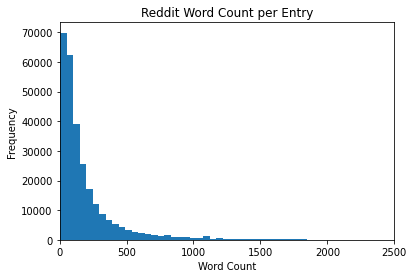

Max word count: 14566
Avg word count: 211
Min word count: 5


<Figure size 432x288 with 0 Axes>

In [29]:
#add a column to include number of words for each entry
reddit_df['word count'] = reddit_df['text'].str.split().astype(str).apply(len)

#visualise the frequency distribution of word count
plt.hist(reddit_df['word count'], density=False, bins=300)
plt.ylabel('Frequency')
plt.xlabel('Word Count')
plt.title('Reddit Word Count per Entry')
plt.xlim(0,2500)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('reddit2.png', dpi=100)

print("Max word count: " + str(max(reddit_df['word count'])))
print("Avg word count: " + str(round(sum(reddit_df['word count'])/len(reddit_df['word count']))))
print("Min word count: " + str(min(reddit_df['word count'])))

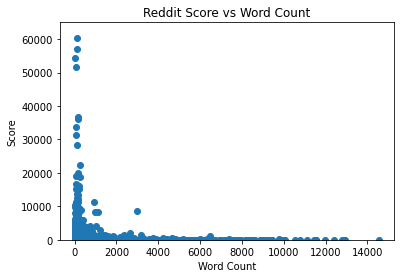

<Figure size 432x288 with 0 Axes>

In [30]:
#score vs word count
plt.figure(figsize=(6,4))
plt.scatter(reddit_df['word count'],reddit_df['score'])
plt.title('Reddit Score vs Word Count')
plt.xlabel('Word Count')
plt.ylabel('Score')
plt.ylim(0,65000)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('reddit3.png', dpi=100)

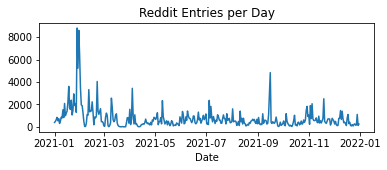

Max entries: 8824 on 2021-01-28 00:00:00
Avg entries: 758
Min entries: 5 on 2021-03-25 00:00:00


<Figure size 432x288 with 0 Axes>

In [31]:
#visualise how many entries posted every day
plt.figure(figsize=(6,2))
plt.plot(reddit_df.groupby('Datetime')['id'].count())
plt.title('Reddit Entries per Day')
plt.xlabel('Date')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('reddit.png', dpi=100)

print("Max entries: " + str(max(reddit_df.groupby('Datetime')['id'].count())) \
      + " on " + str(reddit_df.groupby('Datetime')['id'].count().index[ \
      np.argmax(reddit_df.groupby('Datetime')['id'].count())]))

print("Avg entries: " + str(round(sum(reddit_df.groupby('Datetime')['id'].count())/ \
                                  len(reddit_df.groupby('Datetime')['id'].count()))))

print("Min entries: " + str(min(reddit_df.groupby('Datetime')['id'].count())) \
      + " on " + str(reddit_df.groupby('Datetime')['id'].count().index[ \
      np.argmin(reddit_df.groupby('Datetime')['id'].count())]))

# YouTube Data

In [32]:
#load video titles of the 10 companies
yttitle_df = pd.read_csv('youtube_video_titles_from_query_relevance.csv')

#read all companies youtube comments into one dataset
ytcomms_df = pd.read_csv('ytcomms_df.csv')

In [33]:
##focus only on title
#check if any duplicates
yttitle_df['Video ID'].nunique()

#drop duplicates
yttitle_df = yttitle_df.drop_duplicates(subset=['Video ID'])

In [34]:
#combine all titles and comments into one dataset
yttitle_df = yttitle_df.drop(['query'],axis=1) 
yttitle_df = yttitle_df.rename(columns = {"Video Title":"Entries"})
ytcomms_df = ytcomms_df.rename(columns = {"Comment":"Entries"})
youtube_df = pd.concat([yttitle_df,ytcomms_df])

#converting to datetime format and retain only day information
youtube_df['Timestamp'] = youtube_df.apply(lambda row : datetime.fromisoformat(row['Timestamp'][:-1]+ '+00:00'), axis = 1)
youtube_df['Timestamp'] = youtube_df.apply(lambda row : row['Timestamp'].strftime('%Y-%m-%d'), axis = 1)
youtube_df['Timestamp'] = youtube_df.apply(lambda row : datetime.strptime(row['Timestamp'],"%Y-%m-%d"), axis = 1)

#remove entries that don't belong to Year 2021
youtube_df = youtube_df[youtube_df['Timestamp'] < '2022-01-01']

In [35]:
print(youtube_df.info())
print(youtube_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111153 entries, 0 to 112753
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Video ID   111153 non-null  object        
 1   Entries    111150 non-null  object        
 2   Timestamp  111153 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 3.4+ MB
None
           Video ID Entries            Timestamp
count        111153  111150               111153
unique         3306  103072                  365
top     xNDHiiJaxes       X  2021-04-13 00:00:00
freq           5808      97                 2872
first           NaN     NaN  2021-01-01 00:00:00
last            NaN     NaN  2021-12-31 00:00:00


<ipython-input-35-c35b8190bf9d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(youtube_df.describe())


In [36]:
#drop na
youtube_df = youtube_df[youtube_df.notna()]

In [37]:
#number of unique entry
len(youtube_df)

111153

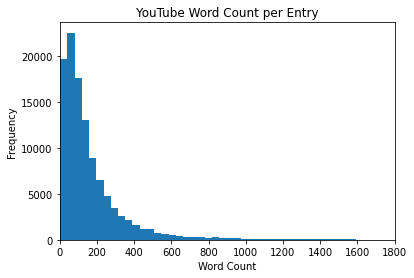

Max word count: 15533
Avg word count: 176
Min word count: 3


<Figure size 432x288 with 0 Axes>

In [38]:
#add a column to include number of words for each entry
youtube_df['word count'] = youtube_df['Entries'].str.split().astype(str).apply(len)

#visualise the frequency distribution of word count
plt.hist(youtube_df['word count'], density=False, bins=400)
plt.ylabel('Frequency')
plt.xlabel('Word Count')
plt.title('YouTube Word Count per Entry')
plt.xlim(0,1800)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('youtube2.png', dpi=100)

print("Max word count: " + str(max(youtube_df['word count'])))
print("Avg word count: " + str(round(sum(youtube_df['word count'])/len(youtube_df['word count']))))
print("Min word count: " + str(min(youtube_df['word count'])))

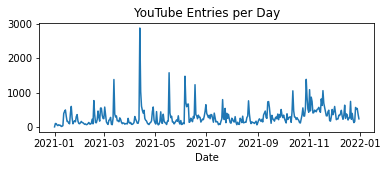

Max entries: 2872 on 2021-04-13 00:00:00
Avg entries: 305
Min entries: 12 on 2021-01-01 00:00:00


<Figure size 432x288 with 0 Axes>

In [39]:
#visualise how many entries posted every day
plt.figure(figsize=(6,2))
plt.plot(youtube_df.groupby('Timestamp')['Video ID'].count())
plt.title('YouTube Entries per Day')
plt.xlabel('Date')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('youtube.png', dpi=100)

print("Max entries: " + str(max(youtube_df.groupby('Timestamp')['Video ID'].count())) \
      + " on " + str(youtube_df.groupby('Timestamp')['Video ID'].count().index[ \
      np.argmax(youtube_df.groupby('Timestamp')['Video ID'].count())]))

print("Avg entries: " + str(round(sum(youtube_df.groupby('Timestamp')['Video ID'].count())/ \
                                  len(youtube_df.groupby('Timestamp')['Video ID'].count()))))

print("Min entries: " + str(min(youtube_df.groupby('Timestamp')['Video ID'].count())) \
      + " on " + str(youtube_df.groupby('Timestamp')['Video ID'].count().index[ \
      np.argmin(youtube_df.groupby('Timestamp')['Video ID'].count())]))